In [1]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rcParams['figure.figsize'] = [16, 68]
from plot_utils import *

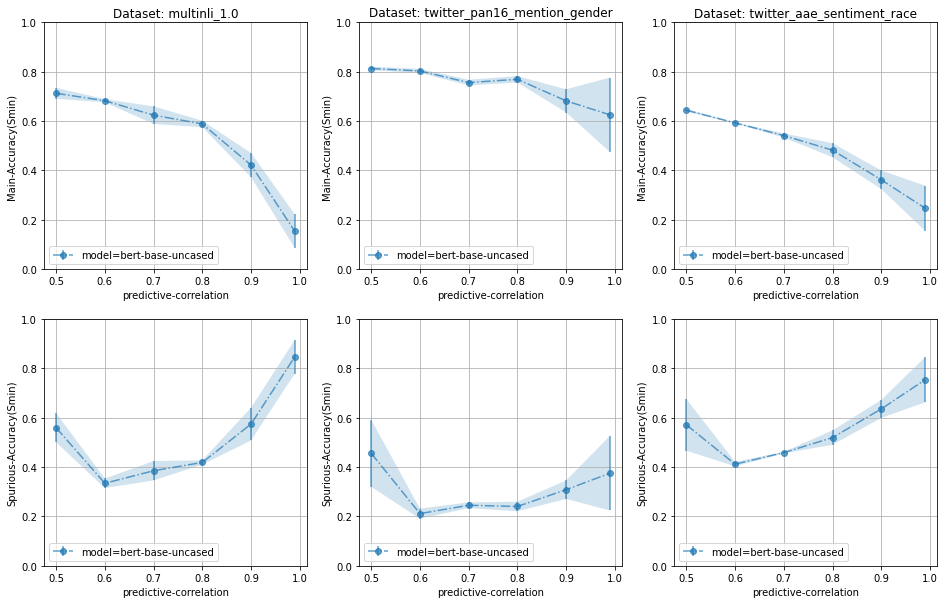

In [5]:
#Getting the pdict for each of the three dataset
run_list=[1,2,3]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
plt.rcParams['figure.figsize'] = [16, 10]
plot_item_list = [
                    "topic0_smin",
                    "main_smin_topic0"
]
plot_item_custname = [ 
                    "Main-Accuracy(Smin)",
                    "Spurious-Accuracy(Smin)"
]


ax=None

#Other hyperparam
model_type="bert-base-uncased"
neg1_fmethod="remove_negation"
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
d="non_causal"
n=0.0
h=0
remmode="adversarial"
adv_rm_method="adv_rm_with_main"
grstrength=0.01
advepoch=20
s=10000

model_type_list=["bert-base-uncased",]
dataset_list = ["multinli_1.0","twitter_pan16_mention_gender","twitter_aae_sentiment_race"]

all_result_dict = defaultdict(dict)
for dataset in dataset_list:
    for model_type in model_type_list:
        if dataset == "twitter_aae_sentiment_race":
            neg1_flip_method = "replace_negation"
        else:
            neg1_flip_method = "remove_negation"
#         try:
        result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      enum=advepoch,
                                      fname_pattern="dataset/{}/nlp_logs/pt.rel.mt({}).neg1_fmethod({}).remmode({}).adv_rm_method({}).grstrength({}).advepoch({}).lt({}).drate({}).l2({}).n({}).h({}).s({}).p({}).r({})/probe_metric_list.json".format(
                                                                          dataset,
                                                                          model_type,
                                                                          neg1_fmethod,
                                                                          remmode,
                                                                          adv_rm_method,
                                                                          grstrength,
                                                                          advepoch,
                                                                          lt,
                                                                          drate,
                                                                          l2,
                                                                          n,
                                                                          h,
                                                                          s,
                                                                          "{}",
                                                                          "{}",
                                  )
        )
#         except:
#             result_dict = None
        all_result_dict[dataset][model_type]=result_dict

# print(all_result_dict)
#Now plotting all the reuslt in one single frame
fig,ax = plt.subplots(len(plot_item_list),len(all_result_dict))
for pidx,(item_name,pname) in enumerate(zip(plot_item_list,plot_item_custname)):
    for didx,(dataset,dset_result_dict) in enumerate(all_result_dict.items()):
        for model_type in model_type_list:
            #print(result_dict)
            result_dict=dset_result_dict[model_type]
            if result_dict==None:
                continue
            
            yval = [result_dict[pval][item_name]["mean"] for pval in pval_list]
            yerr = [result_dict[pval][item_name]["std"] for pval in pval_list]
            ylb = [
                result_dict[pval][item_name]["mean"]-result_dict[pval][item_name]["std"]
                    for pval in pval_list
            ]
            yub = [ 
                result_dict[pval][item_name]["mean"]+result_dict[pval][item_name]["std"]
                    for pval in pval_list
            ]
            #Plotting the guy
            ax[pidx,didx].errorbar(pval_list,yval,yerr,label="model={}".format(model_type),ls="-.",marker="o",alpha=0.7)
            ax[pidx,didx].fill_between(pval_list,ylb,yub,alpha=0.2)


            #Setting the plot attributes
            ax[pidx,didx].set_ylim(0.0,1.0)
            ax[pidx,didx].set_xlabel("predictive-correlation")
            ax[pidx,didx].set_ylabel(pname)



            ax[pidx,didx].legend(loc=3)
            ax[pidx,didx].grid(True)
            if pidx==0:
                ax[pidx,didx].set_title("Dataset: {}".format(dataset))
plt.show()